In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # pandas를 import 해야 합니다.
from scipy.optimize import curve_fit

# CSV 파일 읽기
df = pd.read_csv(
    "../data/input/red_dot_counts_sorted.csv"
)  # CSV 파일을 읽어 DataFrame으로 저장
df.head()  # DataFrame의 첫 몇 행을 출력하여 확인

,Datetime,Number,Red Dot Count,incubation hour
0,2024-11-27 16:43:47,1,0,0.000000
1,2024-11-27 18:31:26,3,114,1.794167
2,2024-11-27 19:11:23,5,957,2.460000
3,2024-11-27 19:51:21,7,1197,3.126111
4,2024-11-27 20:31:28,9,1618,3.794722


In [12]:
def gaussian(x: np.ndarray, amp: float, mu: float, sigma: float) -> np.ndarray:
    """가우시안 함수를 정의합니다."""
    return amp * np.exp(-((x - mu) ** 2) / (2 * sigma**2))  # 가우시안 함수 계산


# x와 y 데이터 설정
x: pd.Series = df["incubation hour"]  # 'incubation hour' 열을 x로 설정
y: pd.Series = df["Red Dot Count"]  # 'Red Dot Count' 열을 y로 설정

# 데이터에 가우시안 함수 적합
popt, _ = curve_fit(
    gaussian, x, y, p0=[max(y), np.median(x), np.std(x)]
)  # 초기 추정값으로 max(y), median(x), std(x) 사용

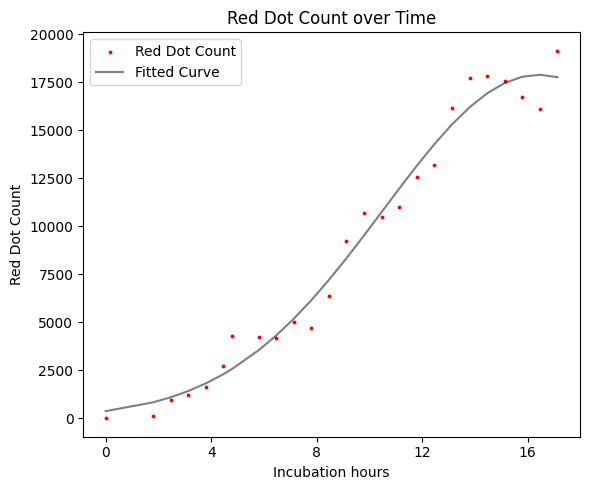

In [14]:
# 그래프 그리기
plt.figure(figsize=(6, 5))  # 그래프 크기 설정
plt.scatter(
    x, y, color="red", label="Red Dot Count", s=3
)  # 데이터 포인트를 빨간색 점으로 표시
plt.plot(
    x, gaussian(x, *popt), label="Fitted Curve", color="black", alpha=0.5
)  # 적합된 곡선을 검은색으로 표시
plt.title("Red Dot Count over Time")  # 그래프 제목 설정
plt.xlabel("Incubation hours")  # x축 레이블 설정
plt.ylabel("Red Dot Count")  # y축 레이블 설정
plt.xticks(np.arange(0, max(x) + 1, step=4))  # x축 눈금 설정
plt.legend()  # 범례 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프 출력